In [74]:
import pandas as pd
import multiprocessing as mp

In [75]:
# Based on the provided search string, related CVEs will be scraped using MITRE CVE results
# CWE types for each CVE will be scraped
# parent and children CWEs for the found CWEs will be scraped
# search_string = "Windows Server 2008 build 6002"
product_list = ['Windows Server 2008 build 6002', 'Windows Server 2008 build 6002', 'Windows Server 2008 build 6002', 
                'Windows Server 2008 build 6002', 'Microsoft System Center build 5.0.8412.1309', 
                'Microsoft Windows 8.1 Pro 6.3.9600 N/A Build 9600', 'Microsoft Windows 8.1 Pro 6.3.9600 N/A Build 9600',
                'Microsoft Windows 8.1 Pro 6.3.9600 N/A Build 9600', 'Microsoft Windows 8.1 Pro 6.3.9600 N/A Build 9600',
                'Microsoft Windows 7 Professional 6.1.7601 Service Pack 1 Build 7601', 'Microsoft Windows 7 Professional 6.1.7601 Service Pack 1 Build 7601',
                'Microsoft Windows 7 Professional 6.1.7601 Service Pack 1 Build 7601',
                'FortiGate 2.8', 'FortiGate 2.8', 'Alpine Linux 3.10', 'Alpine Linux 3.10',
                'Cisco NX-OS 5.2', 'Cisco NX-OS 5.2', 'Cisco NX-OS 5.2', 'Cisco NX-OS 5.2', 'Cisco NX-OS 5.2',
                'Zoneminder 1.30', 'Aware Security', 'Wordpress 5.3', 'Epson PowerLite', 'HP LaserJet 8000dn', 'Canon imageRUNNER 1643i',
                'Kaspersky Security 10.1.1', 'Kaspersky Security 10.1.1', 'Kaspersky Security 10.1.1', 'Kaspersky Security 10.1.1','Kaspersky Security 10.1.1',
                'Kaspersky Security 10.1.1', 'Kaspersky Security 10.1.1', 'Kaspersky Security 10.1.1', 'Kaspersky Security 10.1.1','Kaspersky Security 10.1.1',
                'Acrobat Reader 10.0', 'Acrobat Reader 10.0', 'Acrobat Reader 10.0', 'Acrobat Reader 10.0', 'Acrobat Reader 10.0',
                'Microsoft Office 2017', 'Microsoft Office 2017', 'Microsoft Office 2017', 'Microsoft Office 2017', 'Microsoft Office 2017', 
                'WinRAR 5.91', 'WinRAR 5.91', 'WinRAR 5.91', 'WinRAR 5.91', 'WinRAR 5.91'
               ]

In [76]:
p_list = list(set(product_list)) # Unique list, removing duplicates from the product_list to avoid reduncency 
len(p_list)

17

In [77]:
def find_cves(product):
    # Get CVEs using pandas from the CVE page results using a search String
    product = product.replace(" ", "+")
    url = "https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword="+product
    print('Search string:', product, url)
    # url = 'https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Windows+10'
    df_list = pd.read_html(url)
    # len(df_list) # if 5, then the following code will work.

    if (len(df_list)!=5):
        print("Page style changed at MITRE website, reconfigure")
    # else:
        #     print(df_list[2])    

    # print ((df_list[2]['Name']).to_string(index=False))
    cves_list = ((df_list[2]['Name']).to_string(index=False).split())
    print('Total vulns found:', len(cves_list))
#     print(*cves_list, sep=', ') 
    return cves_list

In [78]:
# pool = mp.Pool(mp.cpu_count())
# total_cves = pool.map(find_cves, product_list)

In [79]:
product_to_cve = {}
for p in p_list:
    product_to_cve[p] = find_cves(p)

Search string: FortiGate+2.8 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=FortiGate+2.8
Total vulns found: 2
Search string: Microsoft+Office+2017 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Microsoft+Office+2017
Total vulns found: 76
Search string: Acrobat+Reader+10.0 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Acrobat+Reader+10.0
Total vulns found: 29
Search string: Microsoft+Windows+8.1+Pro+6.3.9600+N/A+Build+9600 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Microsoft+Windows+8.1+Pro+6.3.9600+N/A+Build+9600
Total vulns found: 691
Search string: Aware+Security https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Aware+Security
Total vulns found: 19
Search string: Cisco+NX-OS+5.2 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Cisco+NX-OS+5.2
Total vulns found: 16
Search string: WinRAR+5.91 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=WinRAR+5.91
Total vulns found: 47
Search string: Kaspersky+Security+10.1.1 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Kaspersky+

In [80]:
cve_to_product = {}
for k, v in product_to_cve.items():
    if isinstance(v, list):
        for c in v:
            if c in cve_to_product.keys():
                cve_to_product[c].extend([k])
            else:
                cve_to_product[c] = [k]
    else:
        if v in cve_to_product.keys():
            cve_to_product[v].extend(k)
        else:
            cve_to_product[v] = [k]

In [81]:
product_to_cve

{'FortiGate 2.8': ['CVE-2005-3058', 'CVE-2005-3057'],
 'Microsoft Office 2017': ['CVE-2017-8744',
  'CVE-2017-8743',
  'CVE-2017-8742',
  'CVE-2017-8725',
  'CVE-2017-8696',
  'CVE-2017-8695',
  'CVE-2017-8682',
  'CVE-2017-8676',
  'CVE-2017-8663',
  'CVE-2017-8654',
  'CVE-2017-8632',
  'CVE-2017-8631',
  'CVE-2017-8630',
  'CVE-2017-8572',
  'CVE-2017-8571',
  'CVE-2017-8570',
  'CVE-2017-8567',
  'CVE-2017-8534',
  'CVE-2017-8531',
  'CVE-2017-8528',
  'CVE-2017-8512',
  'CVE-2017-8511',
  'CVE-2017-8510',
  'CVE-2017-8509',
  'CVE-2017-8508',
  'CVE-2017-8507',
  'CVE-2017-8506',
  'CVE-2017-8502',
  'CVE-2017-8501',
  'CVE-2017-14971',
  'CVE-2017-11939',
  'CVE-2017-11935',
  'CVE-2017-11934',
  'CVE-2017-11884',
  'CVE-2017-11882',
  'CVE-2017-11878',
  'CVE-2017-11877',
  'CVE-2017-11854',
  'CVE-2017-11826',
  'CVE-2017-11825',
  'CVE-2017-11820',
  'CVE-2017-11777',
  'CVE-2017-11775',
  'CVE-2017-11774',
  'CVE-2017-0285',
  'CVE-2017-0284',
  'CVE-2017-0283',
  'CVE-2017-0

In [82]:
cve_to_product

{'CVE-2005-3058': ['FortiGate 2.8'],
 'CVE-2005-3057': ['FortiGate 2.8'],
 'CVE-2017-8744': ['Microsoft Office 2017'],
 'CVE-2017-8743': ['Microsoft Office 2017'],
 'CVE-2017-8742': ['Microsoft Office 2017'],
 'CVE-2017-8725': ['Microsoft Office 2017'],
 'CVE-2017-8696': ['Microsoft Office 2017'],
 'CVE-2017-8695': ['Microsoft Office 2017',
  'Microsoft Windows 8.1 Pro 6.3.9600 N/A Build 9600'],
 'CVE-2017-8682': ['Microsoft Office 2017',
  'Microsoft Windows 8.1 Pro 6.3.9600 N/A Build 9600',
  'Microsoft Windows 7 Professional 6.1.7601 Service Pack 1 Build 7601'],
 'CVE-2017-8676': ['Microsoft Office 2017',
  'Microsoft Windows 8.1 Pro 6.3.9600 N/A Build 9600'],
 'CVE-2017-8663': ['Microsoft Office 2017'],
 'CVE-2017-8654': ['Microsoft Office 2017'],
 'CVE-2017-8632': ['Microsoft Office 2017'],
 'CVE-2017-8631': ['Microsoft Office 2017'],
 'CVE-2017-8630': ['Microsoft Office 2017'],
 'CVE-2017-8572': ['Microsoft Office 2017'],
 'CVE-2017-8571': ['Microsoft Office 2017'],
 'CVE-2017-85

In [83]:
# a container for all CVE entries.
total_cves = []

# for search_string in p_list:
for search_string in product_list:
    total_cves.extend(find_cves(search_string))

print('\nTotal CVEs count:', len(total_cves))
# print(*total_cves, sep=', ')

Search string: Windows+Server+2008+build+6002 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Windows+Server+2008+build+6002
Total vulns found: 8
Search string: Windows+Server+2008+build+6002 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Windows+Server+2008+build+6002
Total vulns found: 8
Search string: Windows+Server+2008+build+6002 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Windows+Server+2008+build+6002
Total vulns found: 8
Search string: Windows+Server+2008+build+6002 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Windows+Server+2008+build+6002
Total vulns found: 8
Search string: Microsoft+System+Center+build+5.0.8412.1309 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Microsoft+System+Center+build+5.0.8412.1309
Total vulns found: 89
Search string: Microsoft+Windows+8.1+Pro+6.3.9600+N/A+Build+9600 https://cve.mitre.org/cgi-bin/cvekey.cgi?keyword=Microsoft+Windows+8.1+Pro+6.3.9600+N/A+Build+9600
Total vulns found: 691
Search string: Microsoft+Windows+8.1+Pro+6.3.9600+N

In [84]:
summary_file = 'vulns_info_v31.csv'
# cwe_reference = 'cwe_ref.csv'

df_summary = pd.read_csv(summary_file, encoding = 'UTF-8')
df_summary = df_summary[~df_summary.CVE_ID.isna()]

In [85]:
df_summary['product'] = df_summary.CVE_ID.apply(lambda x: cve_to_product.get(x, None))
df_summary = df_summary.dropna(subset=['product'])
df_summary['product'] = df_summary['product'].apply(lambda x: x[0])
df_summary.head()

,CVE_ID,Lang,CWE_ID,CWE_Desc,CWE_Plat,CWE_Af_Res,Severity,CVSS_V2,CVSS_V3,Vul_Access_Vector,UserInteractionReq,OS,SW,Ports,PublishedDate,LastModified,Description,URL&Tags,product
1040,CVE-1999-1061,en,NVD-CWE-Other,NaN,NaN,NaN,HIGH,6.4,0.0,NETWORK,False,[],['HP Laserjet'],[],1997-10-04T04:00Z,2017-12-19T02:29Z,"HP Laserjet printers with JetDirect cards, whe...","{""URL0"": ""http://marc.info/?l=bugtraq&m=876022...",HP LaserJet 8000dn
1041,CVE-1999-1062,en,NVD-CWE-Other,NaN,NaN,NaN,HIGH,6.4,0.0,NETWORK,False,[],['HP Laserjet'],['ports 9099 and 9100'],1997-10-04T04:00Z,2017-12-19T02:29Z,"HP Laserjet printers with JetDirect cards, whe...","{""URL0"": ""http://marc.info/?l=bugtraq&m=876022...",HP LaserJet 8000dn
3686,CVE-2001-0909,en,NVD-CWE-Other,NaN,NaN,NaN,HIGH,6.4,0.0,NETWORK,False,"['Microsoft Help', 'Windows XP allows']",['Help Center'],[],2001-11-21T05:00Z,2017-10-10T01:29Z,Buffer overflow in helpctr.exe program in Micr...,"{""URL0"": ""http://marc.info/?l=bugtraq&m=100638...",Microsoft System Center build 5.0.8412.1309
3815,CVE-2001-1040,en,NVD-CWE-Other,NaN,NaN,NaN,MEDIUM,4.9,0.0,NETWORK,False,[],['HP LaserJet'],[],2001-08-31T04:00Z,2008-09-05T20:25Z,"HP LaserJet, and possibly other JetDirect devi...","{""URL0"": ""http://www.securityfocus.com/archive...",HP LaserJet 8000dn
4415,CVE-2002-0058,en,NVD-CWE-Other,NaN,NaN,NaN,MEDIUM,2.9,0.0,NETWORK,False,['Microsoft VM build'],"['Java Runtime', 'Runtime Environment', 'Netsc...",[],2002-03-15T05:00Z,2018-10-12T21:30Z,Vulnerability in Java Runtime Environment (JRE...,"{""URL0"": ""http://marc.info/?l=bugtraq&m=101534...",Microsoft System Center build 5.0.8412.1309


In [104]:
# sum([len(product_to_cve.get(x, 0)) for x in df_summary['product'].values.tolist()])

In [103]:
# df_summary['product'].apply(lambda x: len(product_to_cve.get(x, None)))

In [105]:
# Read CVE count from excel for duplicating rows for re-occurring vulnerabilities.
data_df = pd.read_excel("Risk Model v3.xlsx", sheet_name="Sheet1", skiprows=2, usecols=[1, 2], names=['product_name', 'CVE'])
data_df = data_df.dropna()
data_df.head()

,product_name,CVE
0,Windows Server 2008 build 6002,8.0
1,Windows Server 2008 build 6002,8.0
2,Windows Server 2008 build 6002,8.0
3,Windows Server 2008 build 6002,8.0
4,Microsoft Windows 8.1 Pro 6.3.9600 N/A Build 9600,691.0


In [106]:
# ToDo: Fix this product issue, it is not showing in data, not matching with summary
data_df[data_df.product_name.apply(lambda x: x not in p_list)]

,product_name,CVE
31,Epson PowerLite,20.0


In [90]:
def duplicate(row):
    product_name = row['product_name']
    cve_count = row['CVE']
    cve_list = product_to_cve.get(product_name, None)
    if cve_list is None: return None
    output = df_summary[df_summary["CVE_ID"].isin(cve_list)]
    return output

In [91]:
temp = data_df.apply(lambda x: duplicate(x), axis=1) # list of dataframes for each row in data_df
temp_clean = [t for t in temp if t is not None]

In [92]:
final_data_df = pd.concat(temp_clean, ignore_index=True)

In [93]:
len(final_data_df)

4254

HIGH      2071
MEDIUM    1468
LOW        715
Name: Severity, dtype: int64


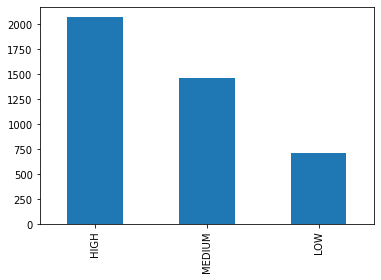

In [94]:
print(final_data_df['Severity'].value_counts())
final_data_df['Severity'].value_counts().plot(kind='bar');

In [95]:
# merged data view
final_data_df.head()

,CVE_ID,Lang,CWE_ID,CWE_Desc,CWE_Plat,CWE_Af_Res,Severity,CVSS_V2,CVSS_V3,Vul_Access_Vector,UserInteractionReq,OS,SW,Ports,PublishedDate,LastModified,Description,URL&Tags,product
0,CVE-2008-0764,en,CWE-134,Use of Externally-Controlled Format String,::LANGUAGE NAME:C:LANGUAGE PREVALENCE:Often::L...,::Memory::,HIGH,10.0,0.0,NETWORK,False,['Windows might'],"['Larson Network', 'Network Print', 'Print Ser...",['port 3114'],2008-02-13T21:00Z,2018-10-15T22:02Z,Format string vulnerability in the logging fun...,"{""URL0"": ""http://aluigi.altervista.org/adv/lst...",Windows Server 2008 build 6002
1,CVE-2008-1299,en,CWE-79,Improper Neutralization of Input During Web Pa...,::LANGUAGE CLASS:Language-Independent:LANGUAGE...,NaN,MEDIUM,2.9,0.0,NETWORK,True,['Windows allows'],"['ManageEngine ServiceDesk', 'Build 7011']",[],2008-03-12T17:44Z,2008-09-05T04:00Z,Cross-site scripting (XSS) vulnerability in So...,"{""URL0"": ""http://secunia.com/advisories/29310""...",Windows Server 2008 build 6002
2,CVE-2008-2099,en,CWE-119,Improper Restriction of Operations within the ...,::LANGUAGE NAME:C:LANGUAGE PREVALENCE:Often::L...,::Memory::,MEDIUM,10.0,0.0,LOCAL,False,['Windows allows'],"['VMware Workstation 6', 'VMware Player 2', 'V...",[],2008-06-02T21:30Z,2018-10-11T20:39Z,Unspecified vulnerability in VMCI in VMware Wo...,"{""URL0"": ""http://secunia.com/advisories/30476""...",Windows Server 2008 build 6002
3,CVE-2008-3698,en,CWE-264,Improper Input Validation,::LANGUAGE CLASS:Language-Independent:LANGUAGE...,NaN,HIGH,10.0,0.0,LOCAL,False,['Windows allows'],"['VMware Workstation 5.5.x', 'Workstation 6.0....",[],2008-09-03T14:12Z,2018-10-31T15:33Z,Unspecified vulnerability in the OpenProcess f...,"{""URL0"": ""http://lists.grok.org.uk/pipermail/f...",Windows Server 2008 build 6002
4,CVE-2008-4278,en,CWE-200,Exposure of Sensitive Information to an Unauth...,::LANGUAGE CLASS:Language-Independent:LANGUAGE...,NaN,LOW,2.9,0.0,LOCAL,False,[],['VMware VirtualCenter 2.5'],[],2008-10-06T19:54Z,2018-10-11T20:51Z,VMware VirtualCenter 2.5 before Update 3 build...,"{""URL0"": ""http://marc.info/?l=bugtraq&m=122331...",Microsoft System Center build 5.0.8412.1309


In [96]:
# Product-wise CWE count 
y = final_data_df.groupby(["product", "CWE_ID"]).size().reset_index(name="Counts")
y

,product,CWE_ID,Counts
0,Acrobat Reader 10.0,CWE-119,40
1,Acrobat Reader 10.0,CWE-189,5
2,Acrobat Reader 10.0,CWE-20,55
3,Acrobat Reader 10.0,CWE-264,5
4,Acrobat Reader 10.0,CWE-79,10
5,Acrobat Reader 10.0,NVD-CWE-Other,15
6,Acrobat Reader 10.0,NVD-CWE-noinfo,15
7,Alpine Linux 3.10,CWE-119,6
8,Alpine Linux 3.10,CWE-189,2
9,Alpine Linux 3.10,CWE-20,4


In [97]:
# df_final = final_data_df.groupby(["CWE_ID"]).size().reset_index(name="Counts").sort_values('Counts', ascending=False)
df_final = final_data_df['CWE_ID'].value_counts().rename_axis('CWE_ID').reset_index(name='Count')
# df_final

In [107]:
# Load CWE-Data from CWE_MASTER 
cwe_master = 'cwe_master1.csv'

import pandas
df_cwe = pandas.read_csv(cwe_master, engine='python')
# df_cwe.loc[df_cwe['CWE-ID'] == df_res.loc[1, "CWE_ID"]]
names, parents = [], []

# iterate through the list
for i in range(len(df_final)) : 
    n = (df_cwe.loc[df_cwe['CWE_ID'] == df_final.loc[i, "CWE_ID"]][['Name']].to_string(index=False)).strip()
    names.append(n[6:].strip()) # Because .strip('Name\n') was stripping N from the NULL Pointer Dereference.
    p = (df_cwe.loc[df_cwe['CWE_ID'] == df_final.loc[i, "CWE_ID"]][['Parents']].to_string(index=False)).strip()
    p = p[9:].strip()
    if (p=='[]'):# if parent is []
        parents.append('None')
    else:
#         parents.append(p[9:].strip())
        p = ''.join(c for c in p if c not in '[]\'')
        parents.append(p)

# Calculating % of risk.
percen = []
for i in range(len(df_final)):
    p = (df_final['Count'][i] * 100) / df_final['Count'].sum()
    percen.append(round(p, 2))
    
# add Names column to dataframe df_final
df_final['Names'] = names
# add parents column to dataframe df_final
df_final['Parents'] = parents
# add the percent column to dataframe df_final
df_final['%'] = percen

# df_final.to_csv('df_final.csv')

print('Total CVEs present in products:', len(total_cves))
print('Total CVEs matched with summary file for detail extraction:', len(final_data_df))
print('Difference:', len(total_cves) - len(final_data_df))
print('Total categories generated:', len(df_final))
print('Sum count:', df_final['Count'].sum())

df_final

Total CVEs present in products: 4295
Total CVEs matched with summary file for detail extraction: 4254
Difference: 41
Total categories generated: 58
Sum count: 4254


,CWE_ID,Count,Names,Parents,%
0,CWE-200,799,Exposure of Sensitive Information to an Unauth...,CWE-668,18.78
1,CWE-119,782,Improper Restriction of Operations within the ...,CWE-118,18.38
2,CWE-264,594,"Permissions, Privileges, and Access Controls",None,13.96
3,CWE-20,455,Improper Input Validation,CWE-707,10.70
4,NVD-CWE-Other,392,Other,None,9.21
5,NVD-CWE-noinfo,306,Insufficient Information,None,7.19
6,CWE-284,112,Improper Access Control,None,2.63
7,CWE-94,85,Improper Control of Generation of Code ('Code ...,"CWE-691, CWE-913, CWE-74",2.00
8,CWE-399,70,Resource Management Errors,None,1.65
9,CWE-79,69,Improper Neutralization of Input During Web Pa...,CWE-74,1.62


In [99]:
# Top 10 categories
df_final.head(10)

,CWE_ID,Count,Names,Parents,%
0,CWE-200,799,Exposure of Sensitive Information to an Unauth...,CWE-668,18.78
1,CWE-119,782,Improper Restriction of Operations within the ...,CWE-118,18.38
2,CWE-264,594,"Permissions, Privileges, and Access Controls",None,13.96
3,CWE-20,455,Improper Input Validation,CWE-707,10.70
4,NVD-CWE-Other,392,Other,None,9.21
5,NVD-CWE-noinfo,306,Insufficient Information,None,7.19
6,CWE-284,112,Improper Access Control,None,2.63
7,CWE-94,85,Improper Control of Generation of Code ('Code ...,"CWE-691, CWE-913, CWE-74",2.00
8,CWE-399,70,Resource Management Errors,None,1.65
9,CWE-79,69,Improper Neutralization of Input During Web Pa...,CWE-74,1.62


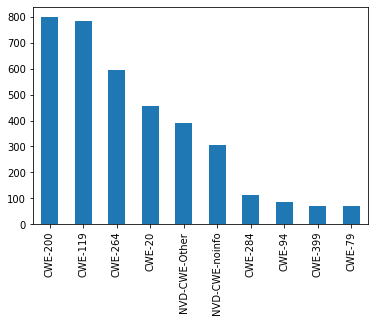

In [100]:
# Top 10 categories
final_data_df['CWE_ID'].value_counts()[:10].plot(kind='bar')

In [101]:
# CWE-wise product counts 
x = final_data_df.groupby(["CWE_ID", "product"]).size().reset_index(name="Counts")
# pandas.set_option('display.max_rows', x.shape[0]+1)
x

,CWE_ID,product,Counts
0,CWE-119,Acrobat Reader 10.0,40
1,CWE-119,Alpine Linux 3.10,6
2,CWE-119,Aware Security,1
3,CWE-119,Cisco NX-OS 5.2,25
4,CWE-119,HP LaserJet 8000dn,1
5,CWE-119,Kaspersky Security 10.1.1,30
6,CWE-119,Microsoft Office 2017,184
7,CWE-119,Microsoft System Center build 5.0.8412.1309,7
8,CWE-119,Microsoft Windows 7 Professional 6.1.7601 Serv...,3
9,CWE-119,Microsoft Windows 8.1 Pro 6.3.9600 N/A Build 9600,472


In [45]:
print('Total CVEs:', len(total_cves))
with open("total_cves.txt", "w") as output:
    output.write(str(total_cves))

# Compare list values to a dataframe column values
with open("missing_cves.txt", "w") as output:
    found,missing=0,0
    for item in total_cves:
        # if item in df_summary['ï»¿CVE-ID'].values: # Entire dataframe
        if item in df_summary['CVE_ID'].values: # just one column
        # if item not in df_summary['ï»¿CVE-ID'].values:
            found+=1
        else:
            output.write(item+'\n')
            print(item, end=' ')
            missing+=1
print('\nFound:', found, 'missing:',missing)

Total CVEs: 4295
CVE-2020-24557 CVE-2020-24556 CVE-2020-24557 CVE-2020-24556 CVE-2020-24557 CVE-2020-24556 CVE-2020-24557 CVE-2020-24556 CVE-2020-24557 CVE-2020-24556 CVE-2020-2035 CVE-2020-25045 CVE-2020-25045 CVE-2020-25045 CVE-2020-25045 CVE-2020-25045 CVE-2020-25045 CVE-2020-25045 CVE-2020-25045 CVE-2020-25045 CVE-2020-25045 
Found: 4274 missing: 21


In [ ]:
# https://thispointer.com/pandas-check-if-a-value-exists-in-a-dataframe-using-in-not-in-operator-isin/
import pandas as pd
empoyees = [('jack', 34, 'Sydney', 155) ,
            ('Riti', 31, 'Delhi' , 177) ,
            ('Aadi', 16, 'Mumbai', 81) ,
            ('Mohit', 31,'Delhi' , 167) ,
            ('Veena', 81, 'Delhi' , 144) ,
            ('Shaunak', 35, 'Mumbai', 135 ),
            ('Shaun', 35, 'Colombo', 111),
            ('Riti', 32, 'Colombo', 111),
            ]
# Create a DataFrame object
empDfObj = pd.DataFrame(empoyees, columns=['Name', 'Age', 'City', 'Marks'])
print('Contents of the dataframe :')
print(empDfObj)

# Check if 81 exist in DataFrame
if 81 in empDfObj['Name'].values:
    print('Element exists in Dataframe')